In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [12]:
games_df = pd.read_csv('data/game/bbref_game.csv')

In [18]:
playoff_start_dates = [
    '2024-04-20',
    '2023-04-15', 
    '2022-04-16',
    '2021-05-22',
    '2020-08-18',
    '2019-04-13',
    '2018-04-14',
    '2017-04-15',
    '2016-04-16',
    '2015-04-18',
    '2014-04-19',
    '2013-04-20',
    '2012-04-28',
    '2011-04-16',
    '2010-04-17',
    '2009-04-18',
    '2008-04-19',
    '2007-04-21',
    '2006-04-22',
    '2005-04-23',
    '2004-04-17',
    '2003-04-19',
    '2002-04-20',
    '2001-04-21',
    '2000-04-22'
]

In [19]:
# Convert DATE column to datetime for comparison
games_df['DATE'] = pd.to_datetime(games_df['DATE'])

# Create a mapping of season to playoff start date
playoff_dates = {}
for date in playoff_start_dates:
    year = int(date[:4])
    # Map to season format (e.g. 2024 -> '2023-24')
    season = f'{year-1}-{str(year)[2:]}' 
    playoff_dates[season] = pd.to_datetime(date)

# Determine game type based on date comparison
def get_game_type(row):
    playoff_date = playoff_dates[row['SEASON']]
    return 'playoff' if row['DATE'] >= playoff_date else 'regular_season'

games_df['GAME_TYPE'] = games_df.apply(get_game_type, axis=1)
games_df.to_csv('data/game/bbref_game_with_game_type.csv', index=False)


In [13]:
# Create separate lists for home and away rest days analysis
home_rest_pts = []
away_rest_pts = []

# Loop through each season
for season in games_df['SEASON'].unique():
    if season >= '2000-01' and season <= '2023-24':
        season_games = games_df[games_df['SEASON'] == season]
        
        # Calculate home points by rest days
        home_rest_avg = season_games.groupby('HOME_REST')['HOME_PTS'].mean().reset_index()
        home_rest_avg['SEASON'] = season
        home_rest_avg['TYPE'] = 'HOME'
        home_rest_pts.append(home_rest_avg)
        
        # Calculate away points by rest days  
        away_rest_avg = season_games.groupby('AWAY_REST')['AWAY_PTS'].mean().reset_index()
        away_rest_avg['SEASON'] = season
        away_rest_avg['TYPE'] = 'AWAY'
        away_rest_pts.append(away_rest_avg)

# Combine results into single dataframe
home_df = pd.concat(home_rest_pts)
away_df = pd.concat(away_rest_pts)

# Rename columns for consistency
home_df = home_df.rename(columns={'HOME_REST': 'REST_DAYS', 'HOME_PTS': 'AVG_PTS'})
away_df = away_df.rename(columns={'AWAY_REST': 'REST_DAYS', 'AWAY_PTS': 'AVG_PTS'})

# Combine home and away into final results
rest_analysis = pd.concat([home_df, away_df]).reset_index(drop=True)

# Sort by season and rest days
rest_analysis = rest_analysis.sort_values(['SEASON', 'TYPE', 'REST_DAYS'])

In [14]:
# Display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(rest_analysis)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

     REST_DAYS     AVG_PTS   SEASON  TYPE
165       2in2   91.017857  2000-01  AWAY
166       2in3   93.740654  2000-01  AWAY
167       2in4   94.028409  2000-01  AWAY
168      2in5+   93.044444  2000-01  AWAY
169  3in4_1in2   93.088235  2000-01  AWAY
170  3in4_2in2   93.986175  2000-01  AWAY
171       4in5   90.731343  2000-01  AWAY
0         2in2   96.918919  2000-01  HOME
1         2in3   96.066543  2000-01  HOME
2         2in4   96.427350  2000-01  HOME
3        2in5+   95.843284  2000-01  HOME
4    3in4_1in2   96.454023  2000-01  HOME
5    3in4_2in2   95.695652  2000-01  HOME
6         4in5   96.411765  2000-01  HOME
172       2in2   92.007692  2001-02  AWAY
173       2in3   94.643766  2001-02  AWAY
174       2in4   93.376289  2001-02  AWAY
175      2in5+   93.966667  2001-02  AWAY
176  3in4_1in2   93.916168  2001-02  AWAY
177  3in4_2in2   93.928230  2001-02  AWAY
178       4in5   91.493506  2001-02  AWAY
7         2in2   97.042254  2001-02  HOME
8         2in3   96.992352  2001-0

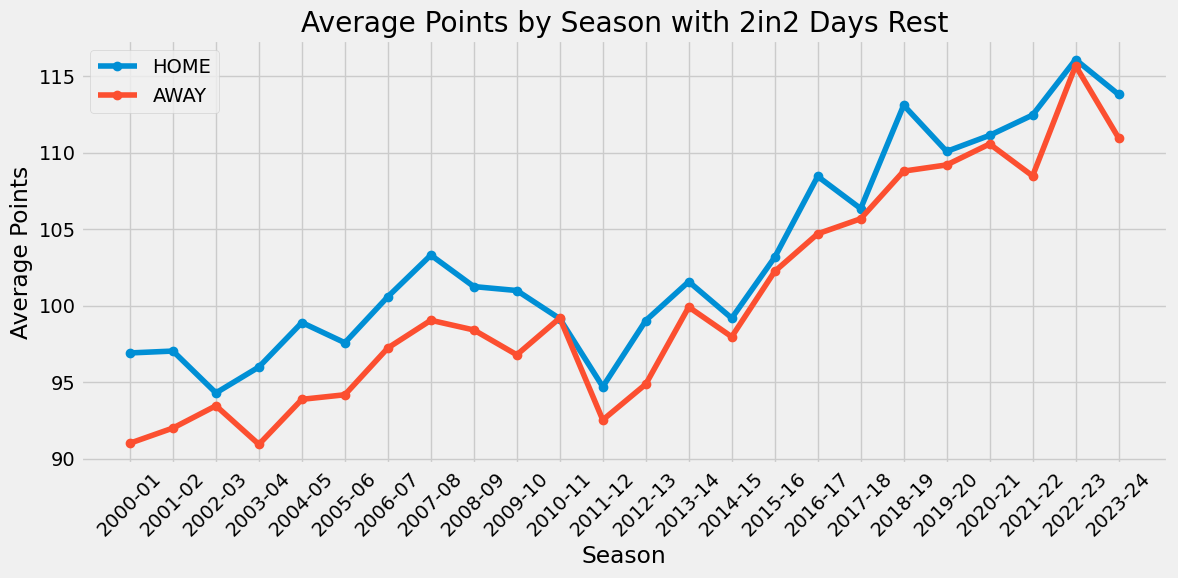

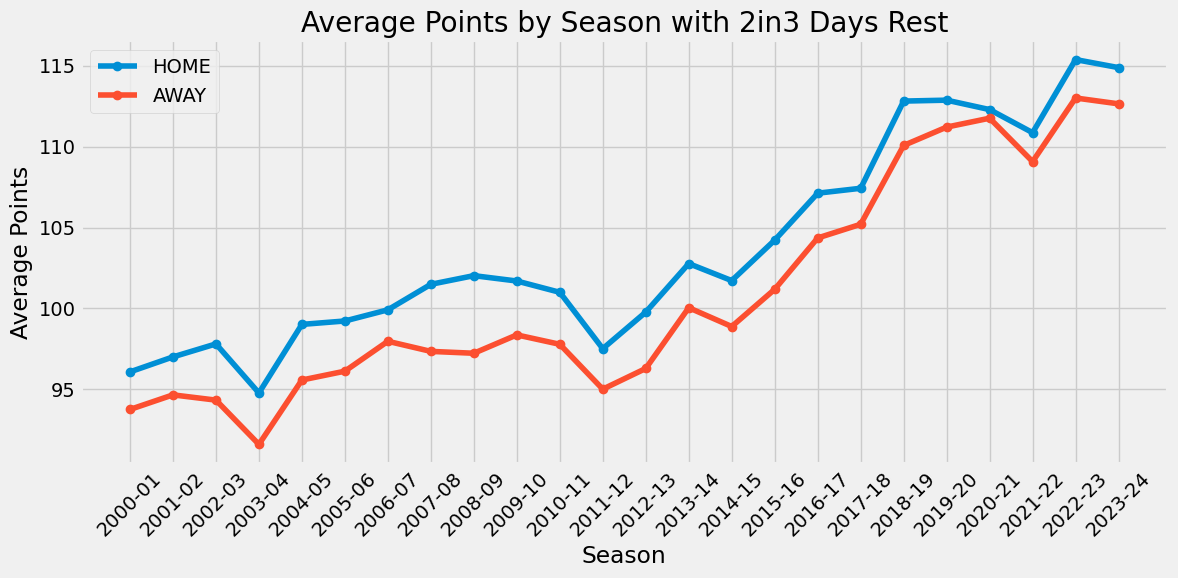

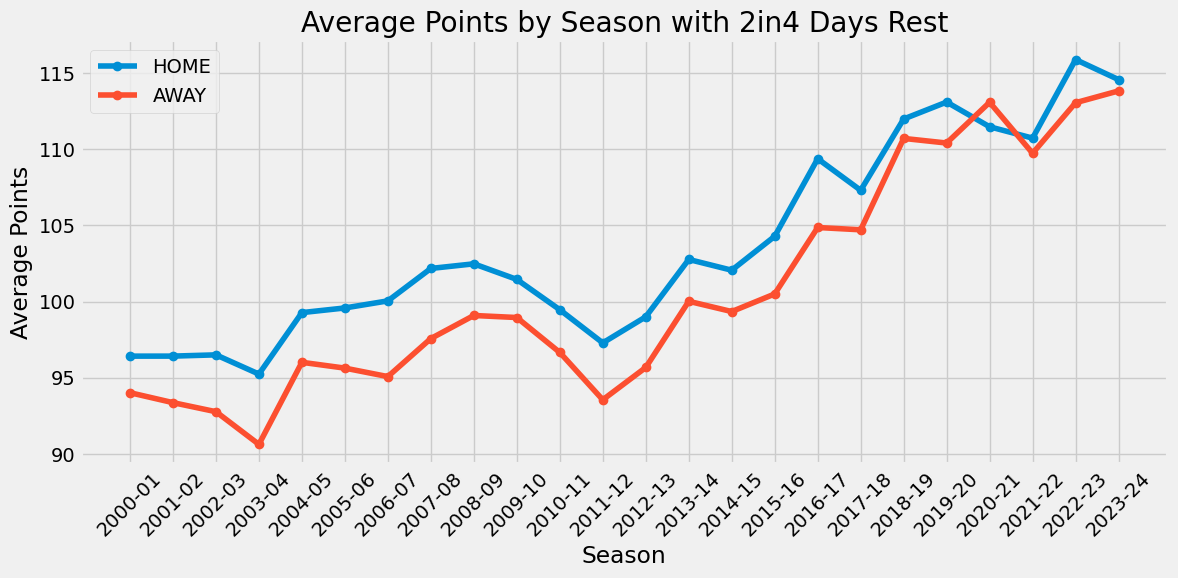

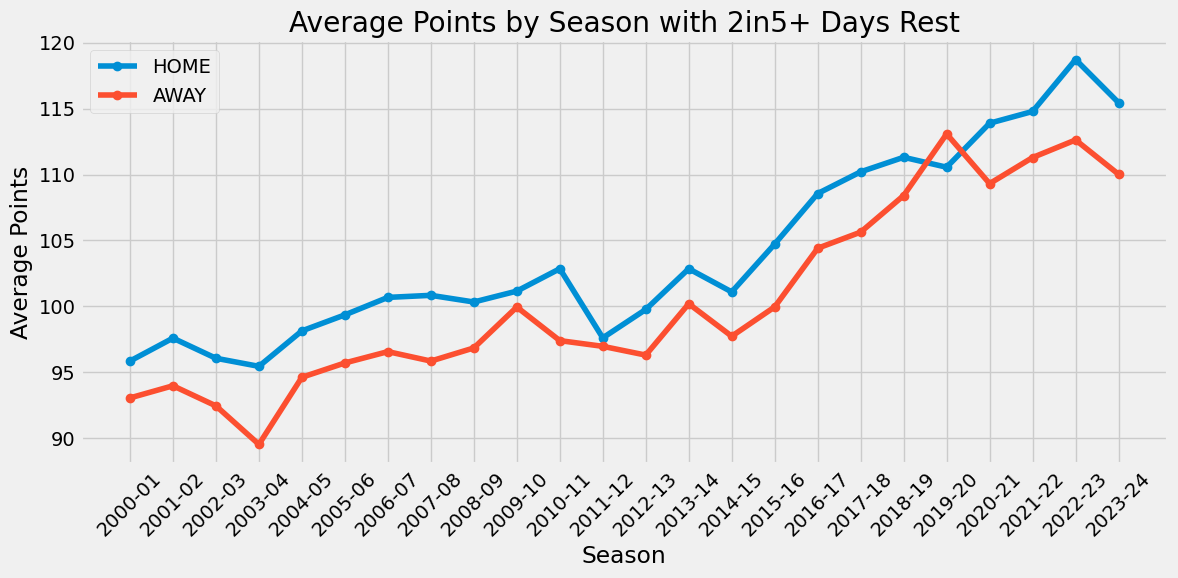

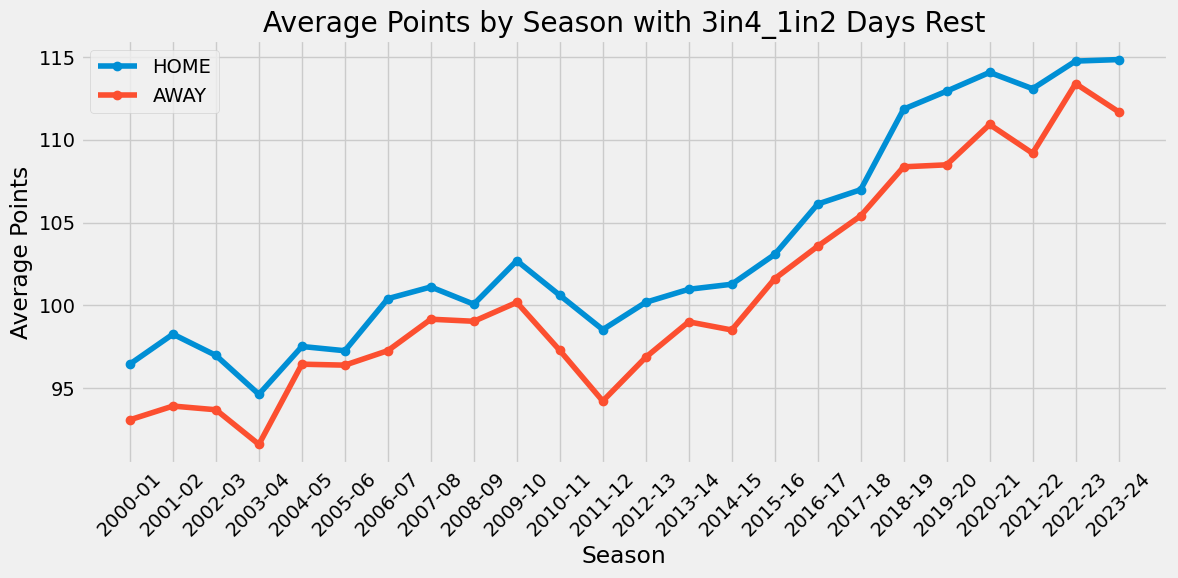

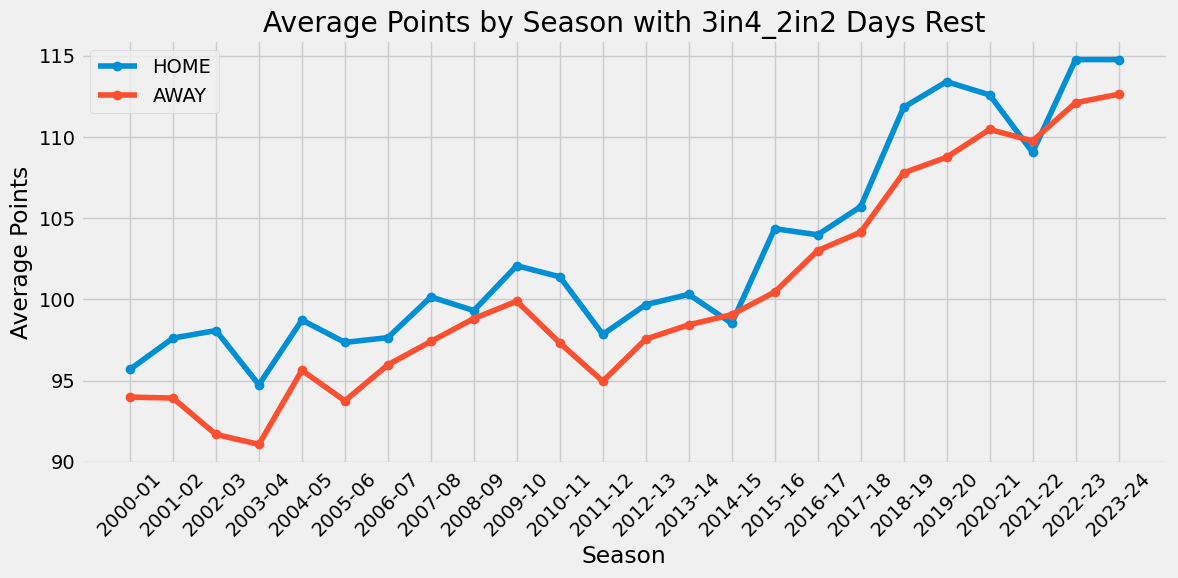

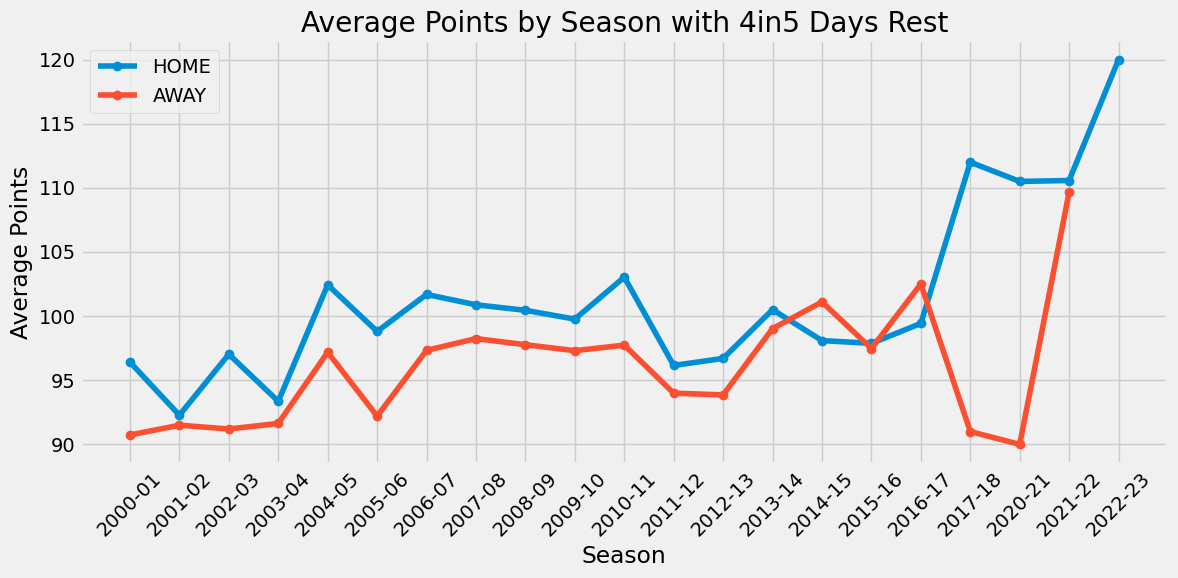

In [15]:
# Create a figure for each unique rest day value
for rest_days in rest_analysis['REST_DAYS'].unique():
    # Filter data for this rest day value
    rest_day_data = rest_analysis[rest_analysis['REST_DAYS'] == rest_days]
    
    # Create figure and axis
    plt.figure(figsize=(12, 6))
    
    # Plot home and away lines
    for location in ['HOME', 'AWAY']:
        location_data = rest_day_data[rest_day_data['TYPE'] == location]
        plt.plot(location_data['SEASON'], location_data['AVG_PTS'], 
                marker='o', label=f'{location}')
    
    # Customize the plot
    plt.title(f'Average Points by Season with {rest_days} Days Rest')
    plt.xlabel('Season')
    plt.ylabel('Average Points')
    plt.legend()
    plt.grid(True)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    plt.show()
